In [2]:
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [21]:
def plot(model_logs):
    for model, log in model_logs:
        with open('/lfs/local/0/prabhat8/rl/'+log+'/progress.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            reward = []
            x = []
            first = True
            for row in spamreader:
                if(first):
                    print(row)
                    first =False
                    continue
                x.append(float(row[1]))
                reward.append(float(row[2]))
            reward = reward
            x = x
            #print(reward)
            plt.plot(x, reward, label=model)
            print(model, max(reward, default=0))
    plt.xlabel('Episodes')
    plt.ylabel('Mean reward (100 episodes)')
    plt.legend()
    plt.show()

['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps']
breakout 9.9
breakout-online-latent-hidden 0
['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps', 'supervised task mean error ']
breakout-online-aout 10.1
['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps', 'supervised task mean error ']
breakout-online-latent 1.2


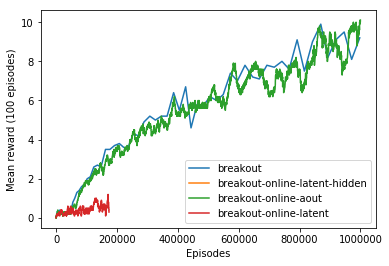

In [20]:
model_logs = [('breakout', 'logs/breakout-baseline-new'), ('breakout-online-latent-hidden', 'Breakout-sequence-turn-latent-hidden/logs'),
                   ('breakout-online-aout', 'Breakout-sequence-turn-aout/logs'), ('breakout-online-latent', 'breakout-sequence-turn/logs')]
plot(model_logs)

['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps']
pong-baseline 19.5
['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps', 'supervised task mean error ']
pong-online-latent-hidden 18.2
['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps', 'supervised task mean error ']
pong-online-aout -19.0
['% time spent exploring', 'episodes', 'mean 100 episode reward', 'steps', 'supervised task mean error ']
pong-online-latent -20.0


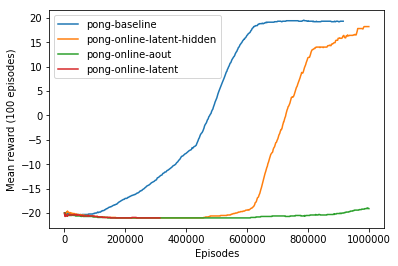

In [18]:
model_logs = [('pong-baseline', 'Pong-baseline/logs'), ('pong-online-latent-hidden', 'Pong-sequence-turn-latent-hidden/logs'),
                   ('pong-online-aout', 'Pong-sequence-turn-aout/logs'), ('pong-online-latent', 'pong-sequence-turn/logs')]
#, 
plot(model_logs)

[98.23, 98.73, 98.96, 99.02, 99.05, 99.1, 99.11, 99.17, 99.14, 99.16, 99.19, 99.18, 99.18, 99.19]
[96.99, 97.32, 97.93, 98.0, 98.38, 98.28, 98.42, 98.45, 98.36, 98.39, 98.51, 98.48, 98.38, 98.45]


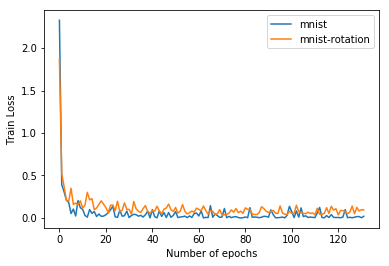

In [51]:
import re
pattern = re.compile('Train Epoch: ([0-9]+).*Loss: ([\.0-9]+)')
test_pattern = re.compile('.* ([0-9]+)/')
for filename, label in [('logs.txt', 'mnist'), ('logs_rotation.txt', 'mnist-rotation')]:
    
    test_accuracy = []
    train_loss = []
    with open('../mnist/' + filename) as f:
        for line in f.readlines():
            line= line.strip()
            if(len(line) == 0):
                continue
            matched = pattern.match(line)
            if(matched):
                train_loss.append(float(matched.group(2)))
                #print(matched.group(1), matched.group(2))
            else:
                test_accuracy.append(float(test_pattern.match(line).group(1))/100.0)
                #print(line)
    plt.plot(train_loss[::10], label=label)
    print(test_accuracy)
    #plt.plot(test_accuracy, label=label)
plt.xlabel('Number of epochs')
#plt.ylabel('Test Accuracy')
plt.ylabel('Train Loss')
plt.legend()
plt.show()     

In [59]:
mnist = [0.9979591836734694, 0.9964757709251101, 0.9932170542635659, 0.996039603960396, 0.9887983706720977, 0.9899103139013453, 0.9895615866388309, 0.9912451361867705, 0.9897330595482546, 0.9851337958374629]
rot = [0.9938775510204082, 0.9955947136563876, 0.9893410852713178, 0.9861386138613861, 0.9867617107942973, 0.9798206278026906, 0.9770354906054279, 0.9766536964980544, 0.9825462012320328, 0.9752229930624381]
i = 0
for m, r in zip(mnist, rot):
    print(i, " & ", round(m*100, 2), " & ", round(r*100, 2), "\\\\")
    i += 1

0  &  99.8  &  99.39 \\
1  &  99.65  &  99.56 \\
2  &  99.32  &  98.93 \\
3  &  99.6  &  98.61 \\
4  &  98.88  &  98.68 \\
5  &  98.99  &  97.98 \\
6  &  98.96  &  97.7 \\
7  &  99.12  &  97.67 \\
8  &  98.97  &  98.25 \\
9  &  98.51  &  97.52 \\
